In [12]:
from pathlib import Path
from collections import Counter

import anndata
import scanpy as sc
import pandas as pd
import seaborn as sns
import umap

import pollock
from pollock.models.model import predict_from_anndata, embed_from_anndata
from pollock.models.explain import explain_predictions

Specify which module to use for cell type predictions. If you haven't trained a module yet try building one with the [pbmc module training](https://github.com/ding-lab/pollock/blob/master/examples/pbmc_model_training.ipynb) example

In [2]:
module_filepath = 'modules/pbmc'

download adata object here

it is also the same anndata object create here

In [3]:
adata = sc.read_h5ad('data/pbmc.h5ad')
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

create a new anndata object where raw counts are stored in .X

In [4]:
prediction_adata = sc.read_10x_mtx('data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols')
prediction_adata.var_names_make_unique()
prediction_adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

## Module prediction

predict cell types

In [5]:
predictions = predict_from_anndata(prediction_adata.copy(), module_filepath)
predictions

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-11-11 15:04:46,740 normalizing counts for prediction
2020-11-11 15:04:46,741 filtering for genes in training set
2020-11-11 15:04:46,754 0 genes in training set are missing from prediction set
2020-11-11 15:04:48,212 starting batch 1 of 1
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-11-11 15:04:48,254 normalizing counts for prediction
2020-11-11 15:04:48,255 filtering for genes in training set
2020-11-11 15:04:48,264 0 genes in training set are missing from prediction set


,predicted_cell_type,cell_type_probability,probability_B,probability_CD14 Monocytes,probability_CD4 T,probability_CD8 T,probability_Dendritic,probability_FCGR3A Monocytes,probability_Megakaryocytes,probability_NK
AAACATACAACCAC-1,CD4 T,0.94,0.00,0.00,0.94,0.06,0.00,0.00,0.00,0.00
AAACATTGAGCTAC-1,B,0.79,0.79,0.01,0.09,0.03,0.03,0.05,0.00,0.00
AAACATTGATCAGC-1,CD4 T,0.79,0.01,0.02,0.79,0.17,0.00,0.01,0.00,0.00
AAACCGTGCTTCCG-1,CD14 Monocytes,0.44,0.01,0.44,0.02,0.06,0.00,0.44,0.00,0.03
AAACCGTGTATGCG-1,NK,0.61,0.02,0.11,0.00,0.15,0.00,0.10,0.01,0.61
...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,CD14 Monocytes,0.70,0.00,0.70,0.01,0.00,0.03,0.26,0.00,0.00
TTTCTACTGAGGCA-1,B,0.56,0.56,0.01,0.21,0.08,0.06,0.03,0.00,0.05
TTTCTACTTCCTCG-1,B,0.85,0.85,0.03,0.04,0.06,0.00,0.01,0.00,0.01
TTTGCATGAGAGGC-1,B,0.39,0.39,0.16,0.07,0.24,0.01,0.08,0.00,0.05


In [6]:
# merge the predictions with our pbmc anndata object
adata.obs = pd.merge(adata.obs, predictions, left_index=True, right_index=True)
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,predicted_cell_type,cell_type_probability,probability_B,probability_CD14 Monocytes,probability_CD4 T,probability_CD8 T,probability_Dendritic,probability_FCGR3A Monocytes,probability_Megakaryocytes,probability_NK
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776,CD4 T,CD4 T,0.94,0.00,0.00,0.94,0.06,0.00,0.00,0.00,0.00
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596,B,B,0.79,0.79,0.01,0.09,0.03,0.03,0.05,0.00,0.00
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736,CD4 T,CD4 T,0.79,0.01,0.02,0.79,0.17,0.00,0.01,0.00,0.00
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085,CD14 Monocytes,CD14 Monocytes,0.44,0.01,0.44,0.02,0.06,0.00,0.44,0.00,0.03
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490,NK,NK,0.61,0.02,0.11,0.00,0.15,0.00,0.10,0.01,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436,CD14 Monocytes,CD14 Monocytes,0.70,0.00,0.70,0.01,0.00,0.03,0.26,0.00,0.00
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422,B,B,0.56,0.56,0.01,0.21,0.08,0.06,0.03,0.00,0.05
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150,B,B,0.85,0.85,0.03,0.04,0.06,0.00,0.01,0.00,0.01
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795,B,B,0.39,0.39,0.16,0.07,0.24,0.01,0.08,0.00,0.05


In [7]:
adata.obs['annotated_cell_type'] = adata.obs['leiden'].to_list()

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'predicted_cell_type' as categorical
... storing 'annotated_cell_type' as categorical


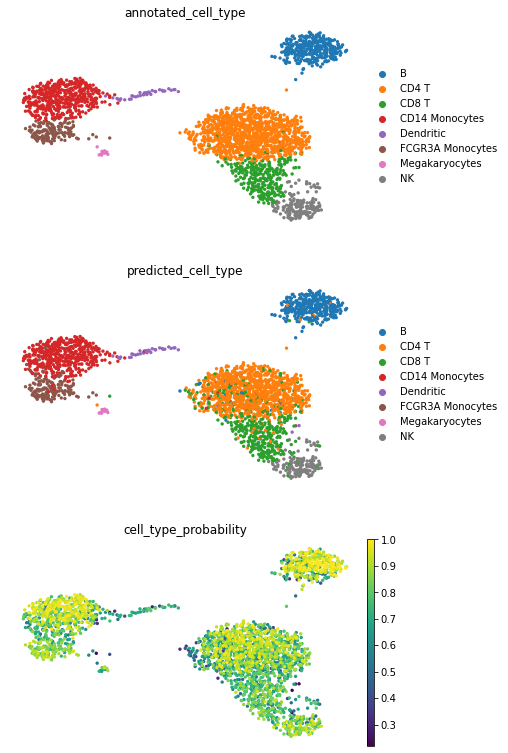

In [8]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

## visualization of cell embeddings

with pollock we can also visualize the cell embeddings created by the BVAE

In [9]:
cell_embeddings = embed_from_anndata(prediction_adata.copy(), module_filepath)
cell_embeddings

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-11-11 15:04:55,309 normalizing counts for prediction
2020-11-11 15:04:55,310 filtering for genes in training set
2020-11-11 15:04:55,322 0 genes in training set are missing from prediction set
2020-11-11 15:04:55,983 starting batch 1 of 1
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-11-11 15:04:56,178 normalizing counts for prediction
2020-11-11 15:04:56,179 filtering for genes in training set
2020-11-11 15:04:56,188 0 genes in training set are missing from prediction set


,CELL_EMBEDDING_1,CELL_EMBEDDING_2,CELL_EMBEDDING_3,CELL_EMBEDDING_4,CELL_EMBEDDING_5,CELL_EMBEDDING_6,CELL_EMBEDDING_7,CELL_EMBEDDING_8,CELL_EMBEDDING_9,CELL_EMBEDDING_10,CELL_EMBEDDING_11,CELL_EMBEDDING_12,CELL_EMBEDDING_13,CELL_EMBEDDING_14,CELL_EMBEDDING_15,CELL_EMBEDDING_16,CELL_EMBEDDING_17,CELL_EMBEDDING_18,CELL_EMBEDDING_19,CELL_EMBEDDING_20
AAACATACAACCAC-1,-3.001581,-1.128448,-2.382483,0.150081,1.614966,-3.029222,-4.035142,3.536004,-2.435880,-0.739340,7.801182,2.451519,-2.234205,-2.104257,0.631263,1.727013,-2.696384,0.844958,-2.877033,0.237939
AAACATTGAGCTAC-1,-6.387304,10.727186,1.870051,-2.076638,1.661028,-5.656908,-15.652680,18.007113,-1.315317,-0.380463,23.325684,12.875451,-2.692018,-13.977033,8.728050,-1.256064,-5.195498,-9.596653,-5.275182,-0.661913
AAACATTGATCAGC-1,-2.987080,-1.307398,-3.392010,0.064569,1.816617,-4.717135,-5.639140,5.558891,-3.829641,-0.234104,11.469724,3.671561,-2.864140,-3.649837,0.275854,3.218186,-4.600902,1.449992,-2.925327,1.572767
AAACCGTGCTTCCG-1,-2.324747,-1.072126,-2.858781,0.735250,1.637463,-0.779186,-5.283876,5.265853,-1.263924,1.008570,8.072493,4.364439,-2.450834,-0.213793,-0.960921,1.877376,-4.777275,-0.596403,-1.657453,0.893733
AAACCGTGTATGCG-1,-0.999806,-0.517127,-2.387017,-0.096712,1.271508,-0.752349,-1.515086,0.775076,-1.269933,0.975473,3.989679,1.005346,-0.822130,-1.060707,-0.932653,0.676133,-1.380265,0.663090,-0.566543,0.756746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,-2.448092,-1.933145,-4.409904,0.718233,1.428809,-1.280101,-5.991967,6.703272,-1.575781,0.033047,10.188716,5.937140,-4.996267,-1.331534,-1.508164,3.774000,-6.453218,0.697165,-0.592507,0.683811
TTTCTACTGAGGCA-1,-4.337765,-2.059345,-3.630904,0.723644,4.920664,-3.984992,-8.405487,4.947671,-5.212675,-0.862449,14.202131,5.107065,-3.475659,-2.936753,0.068879,4.505249,-5.743184,-1.379367,-3.389356,1.106711
TTTCTACTTCCTCG-1,-1.777405,-1.155758,0.230096,0.578313,1.410076,-1.864051,-2.235894,2.221275,-0.808086,-1.934884,4.342061,2.467381,-2.034876,-2.294240,-1.125336,1.952207,-1.529153,0.203484,-2.404632,0.261211
TTTGCATGAGAGGC-1,-0.716308,-0.475097,-0.974792,0.236559,0.492430,-0.312055,-1.730124,1.236944,-0.829893,-0.590925,2.657966,1.106308,-1.021182,-0.878104,0.346089,1.082418,-1.884124,-0.018861,-1.186994,0.741062


In [10]:
adata.obsm['cell_embeddings'] = cell_embeddings.loc[adata.obs.index].values

replace pca generated nearest neighbor and umap with cell embedding generated one

In [13]:
adata.obsm['X_umap'] = umap.UMAP().fit_transform(adata.obsm['cell_embeddings'])

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


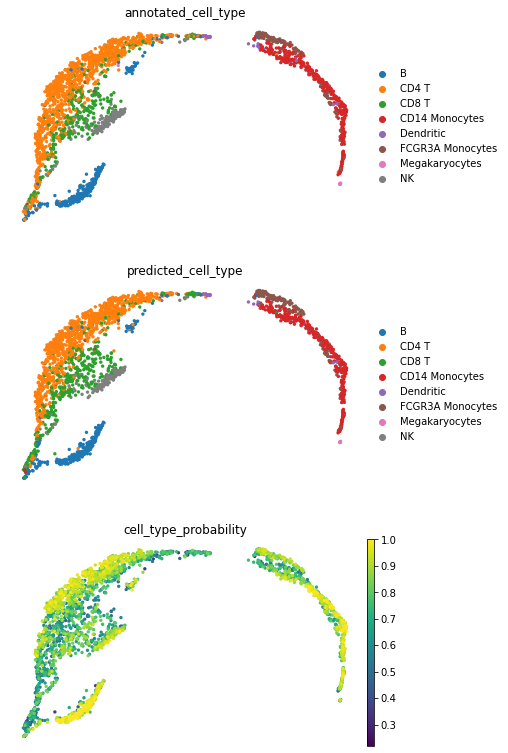

In [14]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

## Module explain

For model explaination, we need to split the dataset up into two pieces
  - explain : anndata object containing cells to be explained. the explaination algorithm can be time consuming (~10min for 100 cells).
  - background : anndata object containing background cells, generally this can be any group of cells from the dataset, as long as the are **not** in the explain_adata.

In [15]:
# here we grab ten of each cell type for explain, and put the rest into background
n = 10
cell_types = sorted(set(adata.obs['predicted_cell_type']))
cell_ids = [cell_id for cell_type in cell_types
           for cell_id in adata.obs[adata.obs['predicted_cell_type']==cell_type].index[:n]]

explain = prediction_adata[cell_ids]
explain.obs = adata.obs.loc[cell_ids]

background_mask = [True if cell_id not in explain.obs.index else False
                  for cell_id in prediction_adata.obs.index]
background = prediction_adata[background_mask]

Counter(explain.obs['predicted_cell_type']).most_common()

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


[('B', 10),
 ('CD14 Monocytes', 10),
 ('CD4 T', 10),
 ('CD8 T', 10),
 ('Dendritic', 10),
 ('FCGR3A Monocytes', 10),
 ('Megakaryocytes', 10),
 ('NK', 10)]

There are some additional arguments that need be be given to explain_predictions
- module_filepath : filepath of module used for prediction.
- prediction_key : column in explain.obs where cell type predictions are stored.
- n_background_cells : number of cells to sample from background_adata. A larger number means more accurate results, but a longer runtime. The default of 100 is usually sufficient.

Gene weights are returned from explain_predictions. They are represented as a dataframe where columns are genes, rows are cells, and the values correspond to how much each gene contributed to a given cells classification. High values mean that gene pushed that cell towards a given prediction.

In [16]:
weights = explain_predictions(explain.copy(), background.copy(), module_filepath,
                             prediction_key='predicted_cell_type', n_background_cells=100)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-11-11 15:14:24,704 normalizing counts for prediction
2020-11-11 15:14:24,706 filtering for genes in training set
2020-11-11 15:14:24,717 0 genes in training set are missing from prediction set
2020-11-11 15:14:25,304 starting batch 1 of 1
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-11-11 15:14:25,343 normalizing counts for prediction
2020-11-11 15:14:25,343 filtering for genes in training set
2020-11-11 15:14:25,355 0 genes in training set are missing from prediction set
2020-11-11 15:14:25,622 normalizing counts for prediction
2020-11-11 15:14:25,623 filtering for genes in training set
2020-11-11 15:14:25,632 

In [17]:
weights

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000480,0.000272,0.0,0.0,0.0,0.0,0.0
AAACTTGAAAAACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000242,0.000354,0.0,0.0,0.0,0.0,0.0
AAAGGCCTGTCTAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000025,0.000026,0.0,0.0,0.0,0.0,0.0
AAAGTTTGATCACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000913,0.000122,0.0,0.0,0.0,0.0,0.0
AAAGTTTGGGGTGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000439,0.000119,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAGATTACCTCAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000277,0.000096,0.0,0.0,0.0,0.0,0.0
AAGCAAGAGGTGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000661,0.000074,0.0,0.0,0.0,0.0,0.0
AAGTAGGATACAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000021,0.000087,0.0,0.0,0.0,0.0,0.0
AATACTGAATTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000437,0.000208,0.0,0.0,0.0,0.0,0.0


visualizing known markers for pbmc cell types

In [20]:
# constructing weights as an AnnData object so we can use anndata/scanpy plotting functionality
feature_adata = anndata.AnnData(X=weights.values,
                       obs=explain.obs.loc[weights.index])
feature_adata.var.index = weights.columns
feature_adata

AnnData object with n_obs × n_vars = 80 × 32738
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_cell_type', 'cell_type_probability', 'probability_B', 'probability_CD14 Monocytes', 'probability_CD4 T', 'probability_CD8 T', 'probability_Dendritic', 'probability_FCGR3A Monocytes', 'probability_Megakaryocytes', 'probability_NK', 'annotated_cell_type'

In [41]:
markers = {
    'NK': ['GNLY', 'NKG7'],
    'T-cell': ['CD3D', 'CD8A'],
    'B-cell': ['CD79A', 'MS4A1'],
    'Monocytes': ['FCGR3A', 'CD14', 'ITGAM'],
    'Megakaryocytes': ['ITGA2B']
}

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


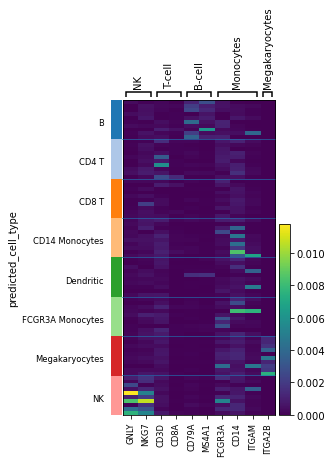

In [42]:
sc.pl.heatmap(feature_adata, var_names=markers, groupby='predicted_cell_type')

Here we run scanpy's DEG workflow to see what features are differentially weighted among the different cell types

In [50]:
adata = feature_adata.copy()
sc.pp.scale(adata)
adata

AnnData object with n_obs × n_vars = 80 × 32738
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'predicted_cell_type', 'cell_type_probability', 'probability_B', 'probability_CD14 Monocytes', 'probability_CD4 T', 'probability_CD8 T', 'probability_Dendritic', 'probability_FCGR3A Monocytes', 'probability_Megakaryocytes', 'probability_NK', 'annotated_cell_type'
    var: 'mean', 'std'

         Falling back to preprocessing with `sc.pp.pca` and default params.


invalid value encountered in log2
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


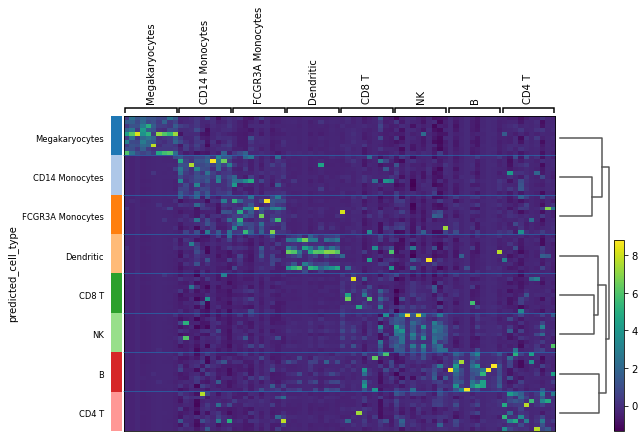

In [51]:
sc.tl.rank_genes_groups(adata, groupby='predicted_cell_type', method='wilcoxon')
sc.pl.rank_genes_groups_heatmap(adata)

Viewing specific groups of cells

categories: B, CD4 T, CD8 T, etc.
var_group_labels: B, Megakaryocytes


is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


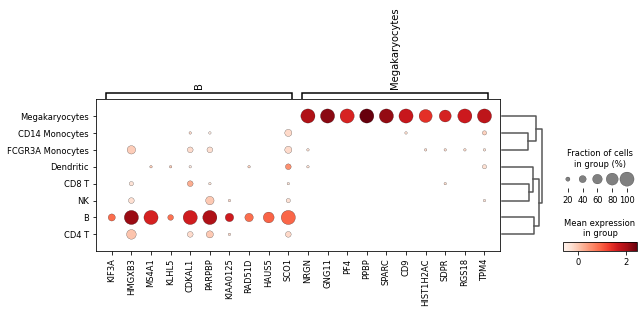

In [52]:
sc.pl.rank_genes_groups_dotplot(adata, groups=['B', 'Megakaryocytes'])